In [ ]:
import warnings
warnings.filterwarnings('ignore') #para ignorar erros
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns #biblitoca para gráficos
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix #métricas de classificação

#Importa os métodos de classificação

# importing RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
#import KNN
from sklearn.neighbors import KNeighborsClassifier
#import Naive Bayes
from sklearn.naive_bayes import GaussianNB
#import SVM
from sklearn.svm import SVC
#import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier


In [ ]:
#Os melhores resultados foram encontrados com os algoritmos KNN e o Naive Bayes, onde a acurácia ficou em xxxxxx#

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_heart = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/winequality-red.csv')
df_heart.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [ ]:
# no null values overall
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


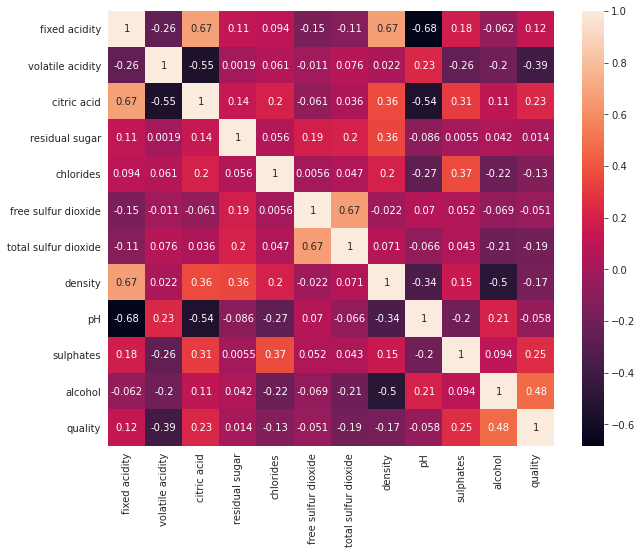

In [ ]:
#gráfico de correlação entre as variáveis
plt.figure(figsize = (10,8))
sns.heatmap(df_heart.corr(),annot=True)

In [ ]:
#conta as diferentes classes
print("Contagem da variável output")
df_heart['quality'].value_counts()

Contagem da variável output


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

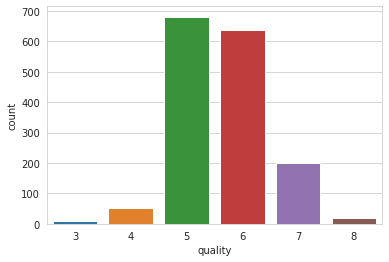

In [ ]:
#exibe gráfico com os plots
sns.set_style('whitegrid')
sns.countplot(df_heart['quality'])

In [ ]:
X = df_heart.drop('quality', axis = 1)
y = df_heart['quality']

In [ ]:
#separa os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [ ]:
print(X_train)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
858            11.7             0.280         0.47  ...  3.15       0.67     10.6
654             8.6             0.470         0.47  ...  3.08       0.46      9.5
721             8.9             0.480         0.24  ...  3.10       0.53      9.2
176             7.3             0.380         0.21  ...  3.33       0.47      9.5
692             8.6             0.490         0.51  ...  3.03       1.17      9.0
...             ...               ...          ...  ...   ...        ...      ...
53              8.6             0.380         0.36  ...  3.20       0.56      9.4
350            10.7             0.670         0.22  ...  3.28       0.98      9.9
79              8.3             0.625         0.20  ...  3.16       1.12      9.1
792             7.1             0.610         0.02  ...  3.48       0.60      9.7
1544            8.4             0.370         0.43  ...  3.17       0.81     11.2

[1119 rows x 11

In [ ]:
#transforma os dados na mesma escala - normaliza os dados
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
print(X_train)

[[ 1.9404823  -1.40893624  1.01909277 ... -1.01278988  0.08253001
   0.19784958]
 [ 0.15795998 -0.36064685  1.01909277 ... -1.45784924 -1.18835636
  -0.84474641]
 [ 0.33046214 -0.30547373 -0.1455265  ... -1.33068943 -0.76472757
  -1.12909078]
 ...
 [-0.01454218  0.4945366  -0.34806898 ... -0.94920997  2.80585793
  -1.22387223]
 [-0.70455083  0.41177691 -1.25951015 ...  1.08534711 -0.34109878
  -0.65518351]
 [ 0.04295854 -0.91237811  0.81655029 ... -0.88563006  0.92978758
   0.7665383 ]]


In [ ]:
#realiza o treinamento no modelo RandomForest
ran_fc = RandomForestClassifier()
ran_fc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#realiza a predição ou seja o teste
rfc_pred = ran_fc.predict(X_test)

In [ ]:
print("Resultado do Modelo RandomForest")
print(classification_report(y_test, rfc_pred)) #realiza a comparação entre o real e o predito

Resultado do Modelo RandomForest
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        17
           5       0.71      0.82      0.76       204
           6       0.64      0.66      0.65       193
           7       0.60      0.46      0.52        59
           8       0.00      0.00      0.00         4

    accuracy                           0.67       480
   macro avg       0.32      0.32      0.32       480
weighted avg       0.63      0.67      0.65       480



Resultado da matriz de Confusão do RandomForest


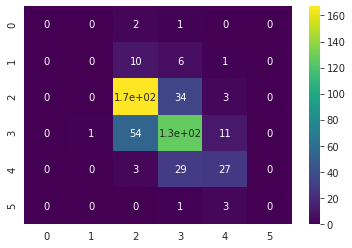

In [ ]:
print("Resultado da matriz de Confusão do RandomForest")
confu_mat = confusion_matrix(y_test, rfc_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')

In [ ]:
#realiza o treinamento no modelo KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

#realiza a predição
knn_pred = knn_model.predict(X_test)

Resultado do Modelo KNN
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.20      0.06      0.09        17
           5       0.61      0.73      0.67       204
           6       0.56      0.50      0.53       193
           7       0.37      0.36      0.36        59
           8       0.00      0.00      0.00         4

    accuracy                           0.56       480
   macro avg       0.29      0.27      0.27       480
weighted avg       0.54      0.56      0.54       480

Resultado da matriz de Confusão do KNN


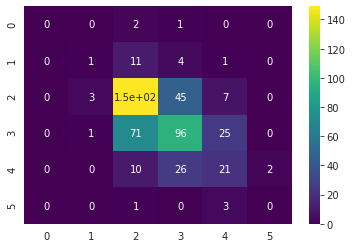

In [ ]:
print("Resultado do Modelo KNN")
print(classification_report(y_test, knn_pred))
print("Resultado da matriz de Confusão do KNN")
confu_mat = confusion_matrix(y_test, knn_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')

In [ ]:
#realiza o treinamento no modelo Gaussiano
gaus_model = GaussianNB()
gaus_model.fit(X_train, y_train)

#realiza a predição
gaus_pred = gaus_model.predict(X_test)


Resultado do Modelo Naive Bayes
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        17
           5       0.66      0.71      0.68       204
           6       0.51      0.42      0.46       193
           7       0.38      0.54      0.44        59
           8       0.00      0.00      0.00         4

    accuracy                           0.54       480
   macro avg       0.26      0.28      0.26       480
weighted avg       0.53      0.54      0.53       480

Resultado da matriz de Naive Bayes


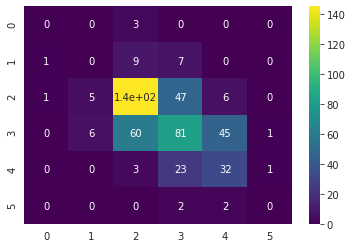

In [ ]:
print("Resultado do Modelo Naive Bayes")
print(classification_report(y_test, gaus_pred))
print("Resultado da matriz de Naive Bayes")
confu_mat = confusion_matrix(y_test, gaus_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')

In [ ]:
#realiza o treinamento no modelo SVM
svm_model = SVC() 
svm_model.fit(X_train, y_train)

#realiza a predição
svm_pred = svm_model.predict(X_test)

Resultado do Modelo SVM
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        17
           5       0.67      0.78      0.72       204
           6       0.60      0.65      0.62       193
           7       0.61      0.32      0.42        59
           8       0.00      0.00      0.00         4

    accuracy                           0.64       480
   macro avg       0.31      0.29      0.29       480
weighted avg       0.60      0.64      0.61       480

Resultado da matriz de SVM


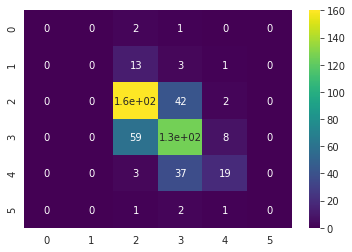

In [ ]:
print("Resultado do Modelo SVM")
print(classification_report(y_test, svm_pred))
print("Resultado da matriz de SVM")
confu_mat = confusion_matrix(y_test, svm_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')

In [ ]:
#realiza o treinamento no modelo Tree
tree_model = DecisionTreeClassifier() 
tree_model.fit(X_train, y_train)

#realiza a predição
tree_pred = tree_model.predict(X_test)


Resultado do Modelo Tree
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.09      0.18      0.12        17
           5       0.64      0.66      0.65       204
           6       0.61      0.52      0.56       193
           7       0.43      0.51      0.47        59
           8       0.00      0.00      0.00         4

    accuracy                           0.56       480
   macro avg       0.30      0.31      0.30       480
weighted avg       0.58      0.56      0.56       480

Resultado da matriz de Tree


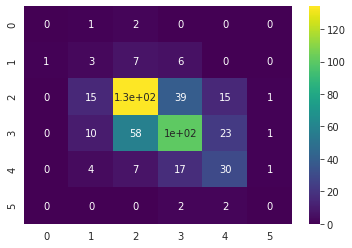

In [ ]:
print("Resultado do Modelo Tree")
print(classification_report(y_test, tree_pred))
print("Resultado da matriz de Tree")
confu_mat = confusion_matrix(y_test, tree_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')

In [ ]:
#realiza o treinamento no modelo Rede Neural Multi Layer Perceptron
mlp_model = MLPClassifier(random_state=1, max_iter=300) 
mlp_model.fit(X_train, y_train)

#realiza a predição
mlp_pred = mlp_model.predict(X_test)

Resultado do Modelo Rede Neural Multi Layer Perceptron
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        17
           5       0.67      0.82      0.74       204
           6       0.61      0.59      0.60       193
           7       0.51      0.37      0.43        59
           8       0.00      0.00      0.00         4

    accuracy                           0.63       480
   macro avg       0.30      0.30      0.29       480
weighted avg       0.59      0.63      0.61       480

Resultado da matriz Rede Neural Multi Layer Perceptron


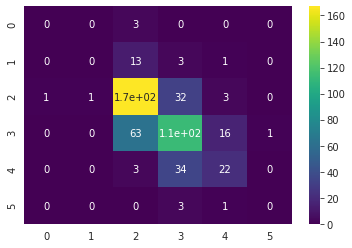

In [ ]:
print("Resultado do Modelo Rede Neural Multi Layer Perceptron")
print(classification_report(y_test, mlp_pred))
print("Resultado da matriz Rede Neural Multi Layer Perceptron")
confu_mat = confusion_matrix(y_test, mlp_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')